In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = pd.read_csv(r"dirty_cafe_sales.csv")

In [3]:
m = data["Item"].mode()
print(m)

0    Juice
Name: Item, dtype: object


In [4]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
#Numeric Columns: Convert Quantity, Price Per Unit, and Total Spent to numeric types:
data[['Quantity', 'Price Per Unit', 'Total Spent']] = data[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric, errors='coerce')

In [7]:

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce', format='%Y-%m-%d')


In [8]:
#Replace "UNKNOWN" and "ERROR" with NaN for consistency:
data.replace(['UNKNOWN', 'ERROR', 'UnKNOWN'], pd.NA, inplace=True)

In [9]:
# List of numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Fill missing values with the median of each column
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)


C:\Users\SKULL\AppData\Local\Temp\ipykernel_8388\4095783206.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
C:\Users\SKULL\AppData\Local\Temp\ipykernel_8388\4095783206.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
# List of categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_cols:
    mode_value = data[col].mode().iloc[0]  # Get the most frequent value
    data[col].fillna(mode_value, inplace=True)


C:\Users\SKULL\AppData\Local\Temp\ipykernel_8388\3972576573.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [11]:
# Categorical Data Standardization
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
    data[col] = data[col].str.upper()


In [12]:
#Check for duplicate Transaction ID:
data.drop_duplicates(subset=['Transaction ID'], inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [14]:
data.shape

(10000, 8)

In [15]:
data = data.dropna(subset=['Transaction Date'])


In [16]:
# See how many missing values exist in each column
print(data.isnull().sum())


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [17]:
print(data.dtypes)


Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


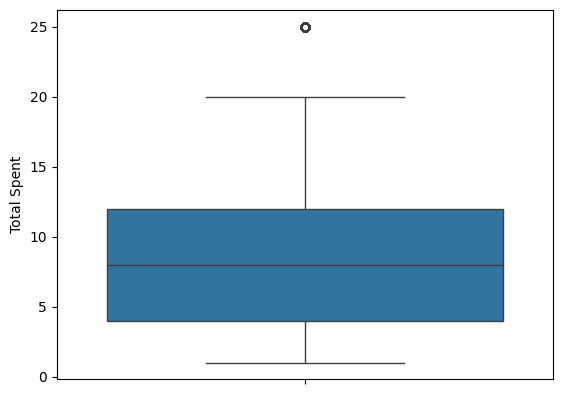

In [18]:
#detecting outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Total Spent'])
plt.show()


In [19]:
import pandas as pd

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and filter out outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only the rows where the column is within bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check the cleaned dataset
print("✅ Cleaned dataset shape:", data.shape)


✅ Cleaned dataset shape: (9290, 8)


In [20]:
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / data.shape[0]
    }

# Show summary
print(outlier_info)


{'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0}, 'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0}, 'Total Spent': {'outlier_count': 0, 'percent_of_data': 0.0}}


In [21]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"Value counts in '{col}':")
    print(data[col].value_counts())
    print('-' * 40)


Value counts in 'Transaction ID':
Transaction ID
TXN_6170729    1
TXN_1961373    1
TXN_4977031    1
TXN_4271903    1
TXN_7034554    1
              ..
TXN_3765707    1
TXN_2847255    1
TXN_8915701    1
TXN_9437049    1
TXN_7619095    1
Name: count, Length: 9290, dtype: int64
----------------------------------------
Value counts in 'Item':
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
----------------------------------------
Value counts in 'Payment Method':
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64
----------------------------------------
Value counts in 'Location':
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
----------------------------------------


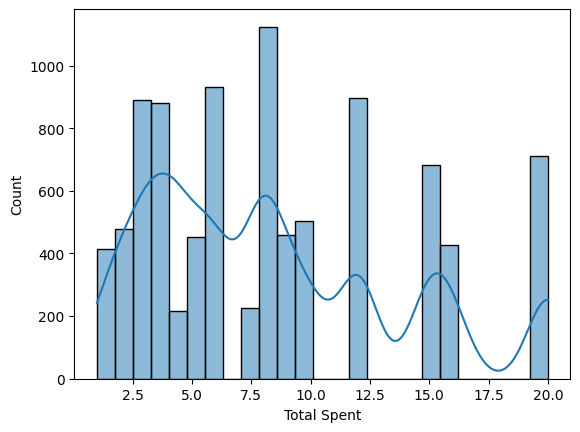

In [22]:
sns.histplot(data['Total Spent'], kde=True)
plt.show()


In [23]:
import numpy as np
data['Total Spent'] = np.log1p(data['Total Spent'])  


In [24]:
print("Unique counts for categorical variables:")
print("• Item:", data['Item'].nunique())
print("• Location:", data['Location'].nunique())
print("• Payment Method:", data['Payment Method'].nunique())


Unique counts for categorical variables:
• Item: 8
• Location: 2
• Payment Method: 3


In [25]:
# Define the columns to clean
cat_cols = ['Item', 'Location', 'Payment Method']

# Replace rare categories (appearing less than 10 times) with "Other"
for col in cat_cols:
    counts = data[col].value_counts()
    rare_categories = counts[counts < 10].index
    data[col] = data[col].replace(rare_categories, 'Other')


In [26]:
print("\nUpdated counts of unique categories:")
print(data['Item'].value_counts())
print(data['Location'].value_counts())
print(data['Payment Method'].value_counts())



Updated counts of unique categories:
Item
JUICE       2030
COFFEE      1123
CAKE        1082
SANDWICH    1075
SMOOTHIE    1048
COOKIE      1035
TEA         1027
SALAD        870
Name: count, dtype: int64
Location
TAKEAWAY    6498
IN-STORE    2792
Name: count, dtype: int64
Payment Method
DIGITAL WALLET    5085
CREDIT CARD       2107
CASH              2098
Name: count, dtype: int64


In [27]:

print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 0


In [28]:
data = data.drop_duplicates()


In [29]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,COFFEE,2.0,2.0,1.609438,CREDIT CARD,TAKEAWAY,2023-09-08
1,TXN_4977031,CAKE,4.0,3.0,2.564949,CASH,IN-STORE,2023-05-16
2,TXN_4271903,COOKIE,4.0,1.0,2.197225,CREDIT CARD,IN-STORE,2023-07-19
3,TXN_7034554,SALAD,2.0,5.0,2.397895,DIGITAL WALLET,TAKEAWAY,2023-04-27
4,TXN_3160411,COFFEE,2.0,2.0,1.609438,DIGITAL WALLET,IN-STORE,2023-06-11


   Location   total_sales  total_quantity  average_spend  average_quantity  \
0  IN-STORE   5818.341421          8309.0       2.083933          2.976003   
1  TAKEAWAY  13460.129760         19317.0       2.071427          2.972761   

   average_growth  
0       -0.126086  
1        0.267046  


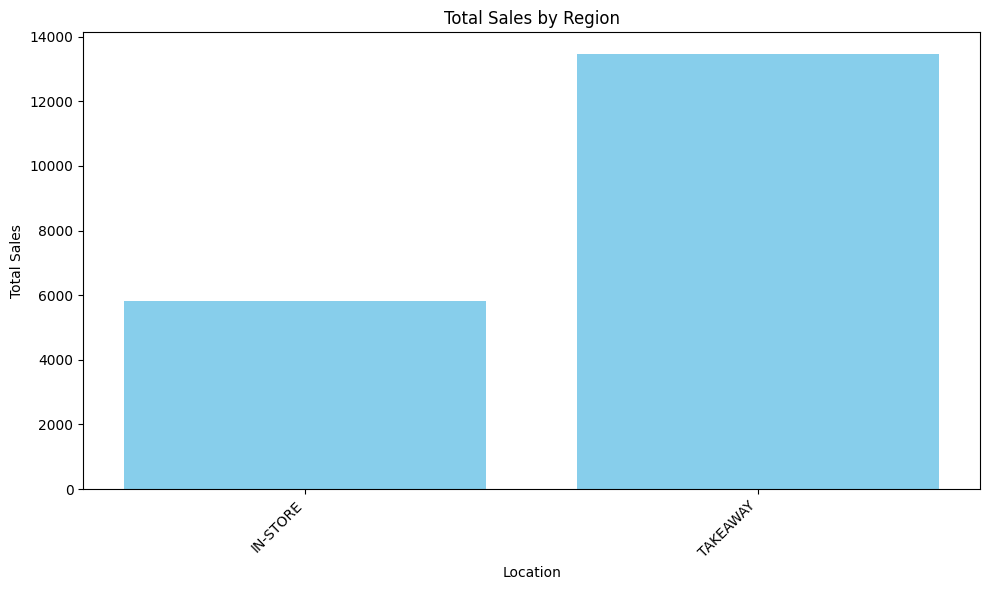

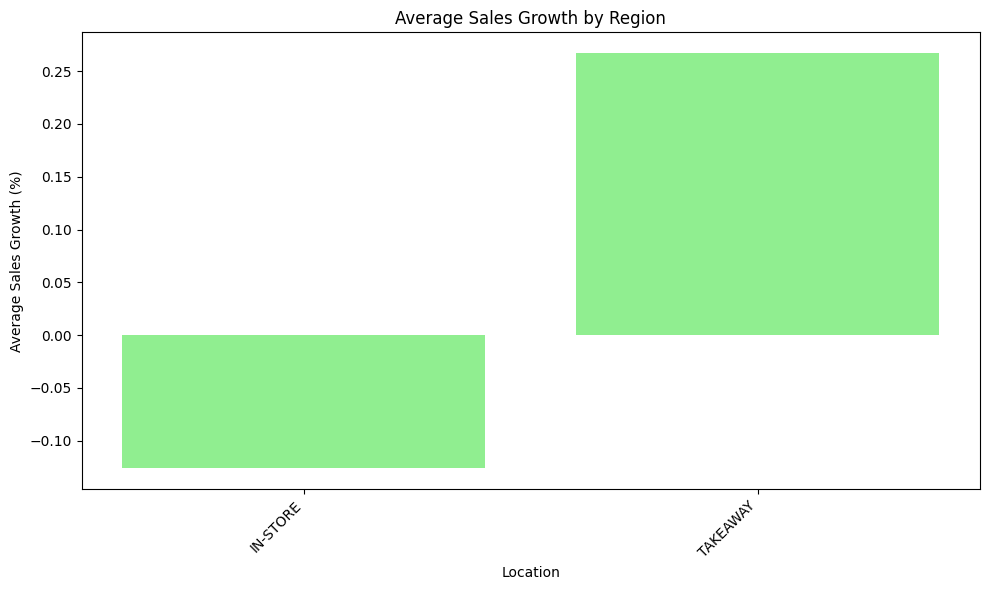

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by Location and calculate total sales, total quantity, average spend, and sales growth
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])  
data['Month'] = data['Transaction Date'].dt.to_period('M')  

# Group by Location to get total sales and other statistics
region_sales = data.groupby('Location').agg(
    total_sales=('Total Spent', 'sum'),
    total_quantity=('Quantity', 'sum'),
    average_spend=('Total Spent', 'mean'),
    average_quantity=('Quantity', 'mean')
).reset_index()


# We will use the 'Month' column and calculate the sum of total sales by month and region
monthly_sales = data.groupby(['Location', 'Month']).agg(
    total_sales_month=('Total Spent', 'sum')
).reset_index()

# Calculate the growth in sales by region over months
monthly_sales['previous_sales'] = monthly_sales.groupby('Location')['total_sales_month'].shift(1)
monthly_sales['sales_growth'] = (monthly_sales['total_sales_month'] - monthly_sales['previous_sales']) / monthly_sales['previous_sales'] * 100
monthly_sales = monthly_sales.dropna() 

# Merge sales growth with region-level summary
region_sales_growth = monthly_sales.groupby('Location').agg(
    average_growth=('sales_growth', 'mean')
).reset_index()

# Combine region-level sales analysis and sales growth data
region_analysis = pd.merge(region_sales, region_sales_growth, on='Location', how='left')

# Display the final results (Total Sales, Average Sales, Growth)
print(region_analysis)

# Visualization - Bar plot of Total Sales by Region
plt.figure(figsize=(10, 6))
plt.bar(region_analysis['Location'], region_analysis['total_sales'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization - Sales Growth by Region (Average Growth)
plt.figure(figsize=(10, 6))
plt.bar(region_analysis['Location'], region_analysis['average_growth'], color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Average Sales Growth (%)')
plt.title('Average Sales Growth by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
